In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle EEG Time Series Data
#
##########################################################################################

In [1]:
##################################################################################################################
#
# YouDo:
#    1) Make a copy of this notebook with your name as a suffix:  
#       BIOS6644_TS_EEG_FirstLast.ipynb
#    2) Do all work in this new notebook.
#    3) Submit completed work via GitHub pull request
#
##################################################################################################################


## Get Data 


Data Description: https://archive.ics.uci.edu/ml/datasets/EEG+Database

Data Set:         https://archive.ics.uci.edu/ml/machine-learning-databases/eeg-mld/


In [11]:
##################################################################################################################
#
# YouDo:
#
#  From the above link, download the file: SMNI_CMI_TRAIN.tar.gz
#  Unzip it and extract the files to a useful location and set
#  the variables filesloc to point to it like:
#  filesloc = '../BIOS6644/Data/SMNI_CMI_TRAIN/'

filesloc = 'C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/'
#for some reason it wouldn't work without putting the whole location in
filesloc

'C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/'

In [47]:
# Standard imports
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib notebook

# Some useful extras
import os
import gzip
import datetime as dt



## File roundup

#The following snippet of code uses the os.walk command to find all files in your filesloc folder.   It then calls the 
unzip function to unzip anything that needs unzipping

In [13]:
# Adapted from https://www.tutorialspoint.com/python/os_walk.htm
# & http://xahlee.info/python/gzip.html

def unzip(filename):
    import gzip
    print('Unzipping {}'.format(filename))
    input = gzip.GzipFile(filename, 'rb')
    s = input.read()
    input.close()

    output = open(filename.split('.gz')[0], 'wb')
    output.write(s)
    output.close()

# Finda all the gzipped files and unzip them
tic = dt.datetime.now()

for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if thispath.endswith('.gz'):
            unzip(thispath)

toc = dt.datetime.now()
print('{} seconds to unzip'.format(toc-tic))


Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.000.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.002.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.007.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.009.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.010.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.012.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.014.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.015.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000364\co2a0000364.rd.017.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.011.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.012.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.013.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.014.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.015.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.016.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.017.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.018.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000369\co2a0000369.rd.019.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.012.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.013.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.014.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.015.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.016.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.017.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.018.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.019.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000372\co2a0000372.rd.021.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.027.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.029.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.031.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.033.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.035.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.037.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.041.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.047.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2a0000378\co2a0000378.rd.051.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.035.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.036.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.037.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.039.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.041.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.043.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.047.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.049.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000339\co2c0000339.rd.053.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.000.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.001.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.003.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.005.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.007.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.011.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.012.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.015.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000344\co2c0000344.rd.016.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.027.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.028.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.029.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.031.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.033.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.037.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.041.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000346\co2c0000346.rd.047.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_TRAIN/co2c0000347\co2c0000347.rd.000.gz
Unzipping C:/Users/tximeleta/Desktop/git/BIOS6644/Data/SMNI_CMI_

In [50]:
##################################################################################################################
#
# YouDo:
#
#   In your filesloc folder find the file co2a0000364/co2a0000364.rd.000
#   
#   1) Open this file and examine its structure in a text editor.
#
#   2) use pd.read_csv to ingest this file into a data frame.  Ensure you skip all lines
#      that start with a "#" (pd.read_csv has this capacity built in).
#      It will have a structure like this:
#
##              0    1    2       3
##       0      0  FP1    0  -8.921
##       1      0  FP1    1  -8.433
##       2      0  FP1    2  -2.574
#
#    3) Notice the structure of this data.  The first column seems to be all of the same 
#       number (0), the second column has entries like FP1, the third column appears to 
#       be a counter, and the last column has positive and negative values.
#       These columns represent  
#           a) the "trial" or iteration number of the recording session 
#           b) the "channel" (which EEG sensor), 
#           c) the time the measurement in ms after starting 
#           d) the actual measurment of the EEG sensor in microvolts
#       
#
#       Give these columns the proper names of 'Time', 'Channel', 'Time', and 'uV'
#######################################  BEGIN STUDENT CODE  #####################################################

# 2) 

df= pd.read_csv(filesloc, sep=' ',skiprows=4, comment='#', header=None)

# looks like this is giving the 61 values, not sure how to change that                 
#help(pd.read_csv)
#3)      
#df.columns = ['Trial', 'Channel', 'Time', 'uV']

#df
#this worked before but is not working now!!!  I had a lovely df with the columns renamed.  
#######################################   END STUDENT CODE   #####################################################


OSError: Initializing from file failed

In [108]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [38]:
##################################################################################################################
#
# YouDo:
#  
#  This data format is quite awkard.  A much better way to display the data would be as a
#  table with columns being the channels (particular EEG sensor), the rows being the time
#  of measurement, and the values being the actual measurements.
#  
#  Building this kind of table from our starting data is called a "pivot", something which 
#  pandas can do for us
#  
#  1) use the pivot method to build a new data frame called dfp which has:
#      columns = channel name (FP1, for example)
#      rows = time (the "counter")
#      values = uV measurements
#
#   2) Make a publication quality visualization of time vs voltage of all channels
#        in this file with a name beginning with the 'C' -- C1, C2, ...
#######################################  BEGIN STUDENT CODE  #####################################################
# 1) 

dfp = pd.pivot_table(df, values=['uV'], index=['Time'], columns=['Channel'])
dfp
#2) 
#pd.pivot_table(dfp, values=['uV'], index=['Time'], columns=['Channel']).plot()
# this worked previously but now is giving a key error on Channels.  
#######################################   END STUDENT CODE   #####################################################


uV                                                               \
Channel     AF1     AF2     AF7     AF8     AFZ     C1     C2     C3      C4   
Time                                                                           
0        -3.713  -2.421  -9.277  -6.378  -4.201  0.315  0.244  0.753   1.017   
1        -5.178  -1.444 -14.648  -3.448  -4.690 -0.173  0.732 -1.200   0.041   
2        -5.178  -1.933 -12.695  -1.007  -4.690 -0.661  0.244 -2.665  -0.936   
3        -2.736  -2.421  -5.859  -1.007  -3.225 -1.149 -0.244 -3.153  -2.401   
4         0.193  -1.933   1.465  -3.448  -0.783 -1.149 -0.244 -2.665  -3.377   
5         2.635  -0.468   5.371  -5.402   2.146 -1.638 -0.244 -2.665  -3.377   
6         3.611   0.509   5.371  -4.913   3.611 -2.126 -0.244 -3.642  -1.912   
7         3.123   0.997   2.930  -2.472   2.635 -2.614  0.732 -5.107  -0.448   
8         1.170   0.509   1.465  -0.031   1.170 -2.614  1.221 -6.083   0.529   
9         0.682   0.020   2.441   2.411   0.193 -2.614  1.221 -5.595   0.529   
10        0.682   1.485   4.883   3.387  -0.295 -1.638  0.732 -3.642   0.529   
11        1.170   3.438   6.348   5.341   0.682 -0.661  0.244 -1.689   0.529   
12        1.170   4.415   5.859   8.270   1.658 -0.173  0.732 -0.712   1.017   
13        1.170   4.415   2.441  10.223   1.658 -0.661  1.221 -0.712   1.994   
14        1.658   3.438  -0.977  10.712   1.658 -0.661  1.709 -0.712   3.459   
15        3.123   2.462  -0.977   8.270   2.635 -0.661  1.709 -1.200   3.459   
16        5.564   1.485   3.906   3.876   3.611 -0.661  0.732 -0.712   2.482   
17        7.029   1.485  11.719  -0.519   4.100 -0.661  0.244 -0.712   1.017   
18        6.541   0.020  17.578  -2.960   2.635 -0.661 -0.732 -1.200  -0.936   
19        3.123  -1.933  17.090  -3.448  -0.295 -1.149 -1.221 -2.665  -1.912   
20       -0.783  -3.398  10.254  -1.984  -3.225 -1.638 -1.221 -3.642  -2.889   
21       -3.225  -2.909   1.953  -0.031  -4.201 -1.149 -1.221 -4.130  -2.401   
22       -1.760  -0.468  -1.953   2.899  -2.736  0.315 -1.221 -2.665  -1.912   
23        2.146   2.950   0.488   4.364   0.682  1.780 -1.709  0.753  -1.912   
24        5.076   4.415   5.371   4.364   2.635  2.757 -1.709  4.171  -2.401   
25        5.076   2.950   7.324   2.899   2.635  3.733 -2.197  7.100  -2.889   
26        2.635   0.020   3.906  -0.031  -0.295  3.733 -2.197  8.077  -3.866   
27       -0.295  -3.398  -1.953  -1.495  -2.736  3.245 -2.197  7.589  -4.354   
28       -1.760  -4.862  -3.906  -0.519  -4.201  3.245 -1.709  6.612  -4.354   
29       -0.783  -4.374   0.977   3.387  -3.225  3.245 -1.709  5.147  -4.354   
...         ...     ...     ...     ...     ...    ...    ...    ...     ...   
226      -1.272   0.020  -2.441  -2.472  -0.783  0.315 -2.686 -1.689  -7.284   
227      -0.783   0.997  -3.906  -6.378   0.193  0.804 -2.686 -1.200  -6.795   
228      -1.272   0.509  -7.324 -11.261  -0.295  0.315 -3.174 -0.712  -6.795   
229      -2.248  -0.468  -7.324 -12.726  -1.760 -0.173 -3.174 -1.200  -6.307   
230      -3.713  -1.933  -3.906  -8.820  -3.713 -0.661 -2.686 -1.689  -6.307   
231      -4.690  -2.909   0.977  -2.472  -5.178 -1.638 -2.686 -2.665  -5.819   
232      -5.178  -3.398   1.953   1.923  -5.666 -1.638 -2.686 -2.665  -6.307   
233      -5.178  -4.374  -2.441  -0.519  -5.666 -1.149 -3.174 -1.689  -6.795   
234      -4.201  -5.839  -8.789  -7.843  -5.178  0.315 -3.662 -0.224  -7.284   
235      -3.713  -8.280 -12.207 -15.656  -4.690  1.292 -4.150  0.753  -8.260   
236      -2.736  -9.257 -11.230 -18.585  -4.201  1.780 -4.639  0.753  -8.748   
237      -2.736  -9.745  -8.301 -16.144  -4.201  1.292 -4.639 -0.224  -9.237   
238      -3.713  -7.792  -7.324 -10.773  -4.201  0.315 -4.639 -1.689  -9.725   
239      -4.690  -6.327  -7.812  -7.355  -4.690 -0.173 -5.127 -3.153 -10.701   
240      -5.666  -5.839  -9.277  -8.820  -5.178 -0.173 -5.615 -2.665 -11.678   
241      -5.666  -7.304  -8.301 -14.191  -5.178  0.315 -5.615 -1.200 -11.678   
242      -5.1

In [42]:

help(pd.pivot_table).plot()

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can 

AttributeError: 'NoneType' object has no attribute 'plot'

## File ingest
This data set has 304 different EEG sensor recordings.  We'd like to scale the data across channels & trials for use in machine learning models later.

The following bit of code also uses os.walk but this time imports all of the files into a big dictionary with one key for each "trial" of the experiment.  The mechanism of import is very similar to what you did above.

In [23]:
dfs = dict()
tic = dt.datetime.now()
for root, dirs, files in os.walk(filesloc, topdown=False):
    for name in files:
        thispath = os.path.join(root, name)
        if '.rd.' in thispath and not thispath.endswith('.gz'):
            thispatient = thispath.split('.rd.')[1]
            df=pd.read_csv(thispath  ,sep=' ',skiprows=4, comment='#',header=None)
            df.columns=['Trial','Channel','Time','uV']
            dfs[int(thispatient)] = df.pivot(index='Time', columns='Channel',values='uV')
            
toc = dt.datetime.now()
print('{} seconds to read to dfs'.format(toc-tic))

0:00:22.066670 seconds to read to dfs


In [27]:
# You can access a particular trial like this:
dfs[5].head()



Channel,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,C5,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
Time,,,,,,,,,,,,,,,,,,,,,
0,-0.539,0.244,-0.031,-2.492,0.092,0.387,1.780,-0.244,3.265,-2.513,...,0.783,1.994,1.465,-1.912,-1.475,-0.732,0.722,-21.759,-1.811,1.200
1,-4.445,-2.197,-5.890,-4.934,-3.326,-1.078,0.804,-2.686,1.801,-5.931,...,-0.682,1.017,1.465,-5.330,-2.940,-5.127,-1.719,-24.200,-6.205,-1.241
2,-8.352,-3.662,-14.191,-4.445,-5.280,-2.543,0.804,-5.127,1.312,-9.349,...,-0.682,0.041,0.977,-9.725,-3.428,-9.521,-2.207,-15.411,-11.088,-2.706
3,-10.305,-4.639,-20.050,-2.492,-5.768,-3.031,1.292,-6.592,1.801,-11.302,...,1.760,1.017,1.953,-12.166,-1.963,-10.498,-0.743,0.214,-13.529,-2.218
4,-8.840,-3.662,-19.562,-1.516,-4.303,-2.055,1.780,-5.615,2.777,-9.837,...,4.690,2.970,3.418,-11.678,-0.498,-8.057,1.699,9.491,-11.088,0.224


AttributeError: module 'pandas' has no attribute 'plot'

<IPython.core.display.Javascript object>


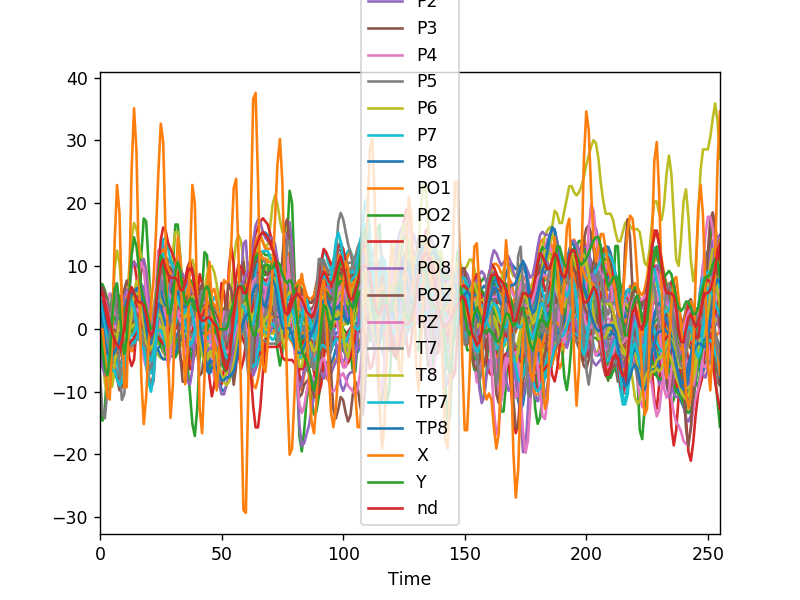

In [40]:
##################################################################################################################
#
# YouDo:
#  
#  1) 
#   Loop through all the trials and find the global min & max values.
#   
#  2) Make a time vs. voltage visualization of the channel which contains the
#     highest peak from each trial.   I.e.  if the highest measure is in channel FP1,
#     make a plot showing FP1 from every trial.
#
# 
#  3) After re-reading the data documentation, propose an explanation for what you see 
#     in the plot.
#######################################  BEGIN STUDENT CODE  #####################################################

#1) 
#Literally have no idea where to start except I know we did this type of loop to find min and max in the XML exercise.

#2) 
df.pivot(index='Time', columns='Channel',values='uV').plot()
    
#3) 
#The data represents EEG readings from 10 alcholic and 10 control subjects who were given a stimulus in the form of an image.
#I suppose without looking at the min an max data we were supposed to find in #1 I would imagine that the alcoholic subjects 
#might have dulled responses to the stimulus compared to the controls.  Looks as though the researchers are hoping to correlate
# stimulus response to predisposition to alcoholism.  




#######################################   END STUDENT CODE   #####################################################
